In [1]:
!pip install torch
import torch
print(torch.__version__)

2.2.2


In [2]:
!pip install datasets

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset, load_metric
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sirismitharao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Loading Dataset

In [4]:
from datasets import load_dataset

# Load the CNN/DailyMail dataset with version '3.0.0'
dataset = load_dataset('cnn_dailymail', '3.0.0')

print(f"Features in cnn_dailymail : {dataset['train'].column_names}")

Features in cnn_dailymail : ['article', 'highlights', 'id']


In [5]:
sample = dataset["train"][1]
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])

Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most s

Summary (length: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


### Text Cleaning

Removing HTML Tags

In [6]:
# Removing HTML Tags
import re

def remove_html(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

In [7]:
# Clean the text in the dataset for the 'train' split
for i in dataset['train']:
    i['article'] = remove_html(i['article'])
    i['highlights'] = remove_html(i['highlights'])

# Clean the text in the dataset for the 'test' split
for i in dataset['test']:
    i['article'] = remove_html(i['article'])
    i['highlights'] = remove_html(i['highlights'])

# Clean the text in the dataset for the 'validation' split
for i in dataset['validation']:
    i['article'] = remove_html(i['article'])
    i['highlights'] = remove_html(i['highlights'])

Converting the text into Lower case

In [8]:
# Convert text to lowercase in the dataset for the 'train' split
for i in dataset['train']:
    i['article'] = i['article'].lower()
    i['highlights'] = i['highlights'].lower()

# Convert text to lowercase in the dataset for the 'test' split
for i in dataset['test']:
    i['article'] = i['article'].lower()
    i['highlights'] = i['highlights'].lower()

# Convert text to lowercase in the dataset for the 'validation' split
for i in dataset['validation']:
    i['article'] = i['article'].lower()
    i['highlights'] = i['highlights'].lower()

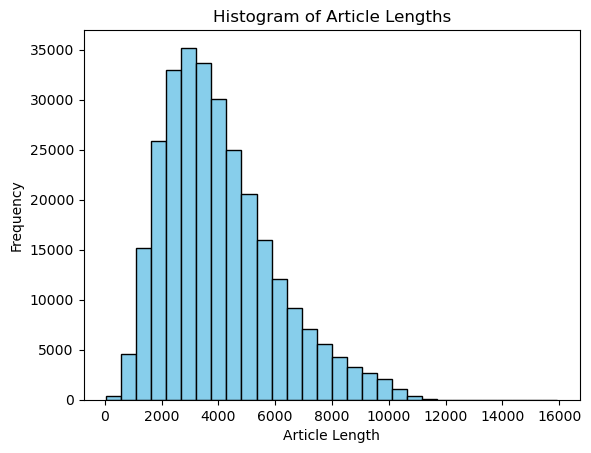

In [9]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles
article_lengths = [len(i['article']) for i in dataset['train']]

# Plot histogram of article lengths
plt.hist(article_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Article Lengths')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

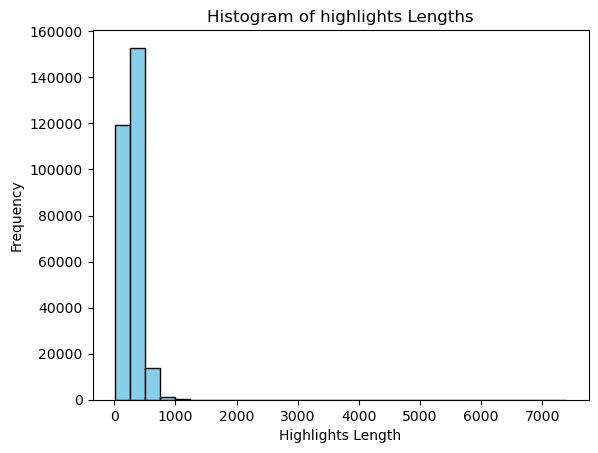

In [10]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles
article_lengths = [len(i['highlights']) for i in dataset['train']]

# Plot histogram of article lengths
plt.hist(article_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of highlights Lengths')
plt.xlabel('Highlights Length')
plt.ylabel('Frequency')
plt.show()

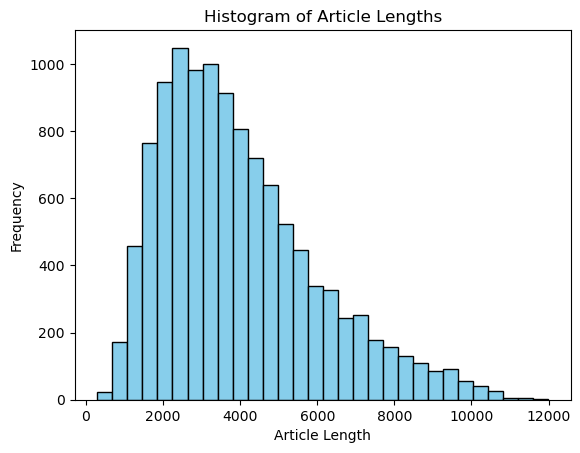

In [11]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles
article_lengths = [len(i['article']) for i in dataset['test']]

# Plot histogram of article lengths
plt.hist(article_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Article Lengths')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

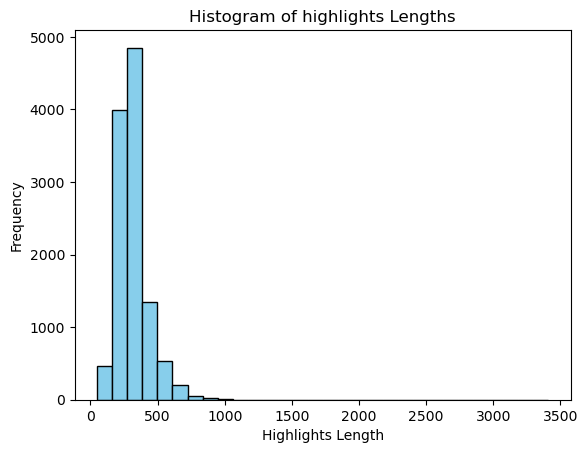

In [12]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles
article_lengths = [len(i['highlights']) for i in dataset['test']]

# Plot histogram of article lengths
plt.hist(article_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of highlights Lengths')
plt.xlabel('Highlights Length')
plt.ylabel('Frequency')
plt.show()

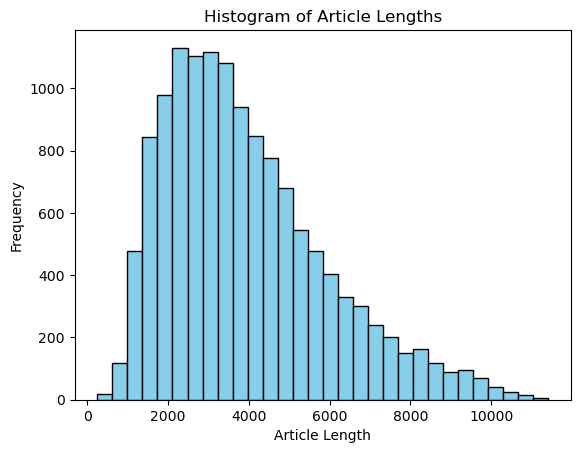

In [13]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles
article_lengths = [len(i['article']) for i in dataset['validation']]

# Plot histogram of article lengths
plt.hist(article_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Article Lengths')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()

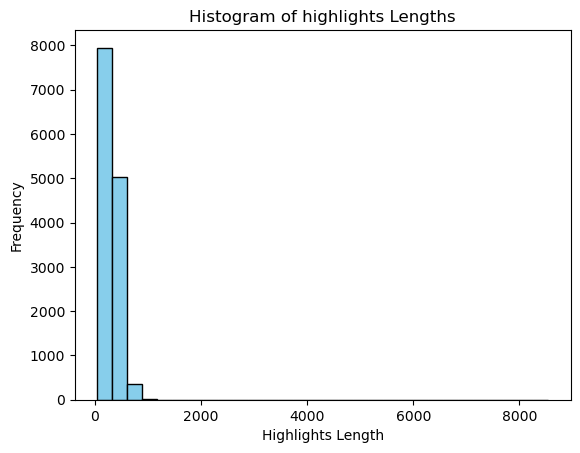

In [14]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles
article_lengths = [len(i['highlights']) for i in dataset['validation']]

# Plot histogram of article lengths
plt.hist(article_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of highlights Lengths')
plt.xlabel('Highlights Length')
plt.ylabel('Frequency')
plt.show()

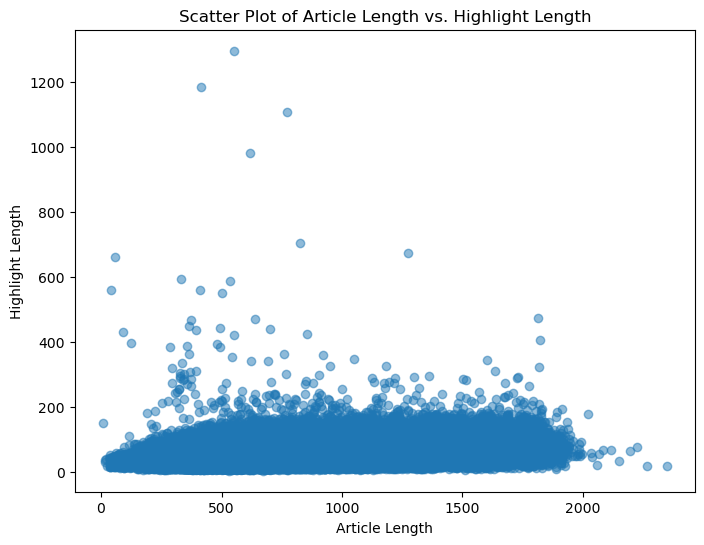

In [15]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles and highlights
article_lengths = [len(i['article'].split()) for i in dataset['train']]
highlight_lengths = [len(i['highlights'].split()) for i in dataset['train']]

# Create scatter plot of article length vs. highlight length
plt.figure(figsize=(8, 6))
plt.scatter(article_lengths, highlight_lengths, alpha=0.5)
plt.title('Scatter Plot of Article Length vs. Highlight Length')
plt.xlabel('Article Length')
plt.ylabel('Highlight Length')
plt.show()

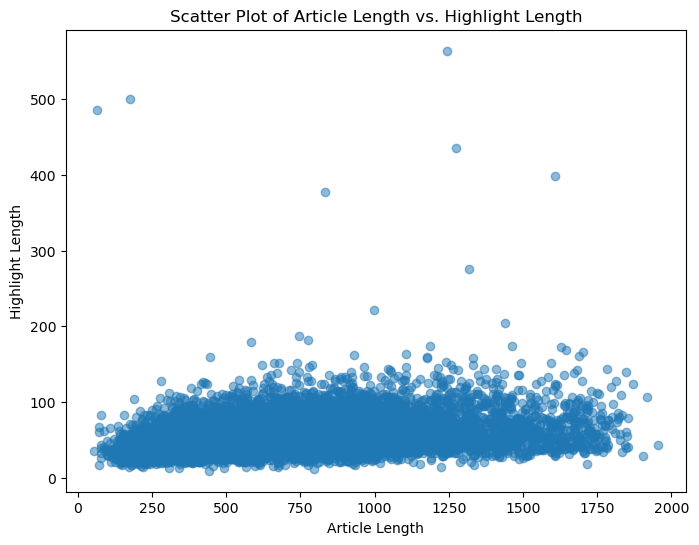

In [16]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles and highlights
article_lengths = [len(i['article'].split()) for i in dataset['test']]
highlight_lengths = [len(i['highlights'].split()) for i in dataset['test']]

# Create scatter plot of article length vs. highlight length
plt.figure(figsize=(8, 6))
plt.scatter(article_lengths, highlight_lengths, alpha=0.5)
plt.title('Scatter Plot of Article Length vs. Highlight Length')
plt.xlabel('Article Length')
plt.ylabel('Highlight Length')
plt.show()

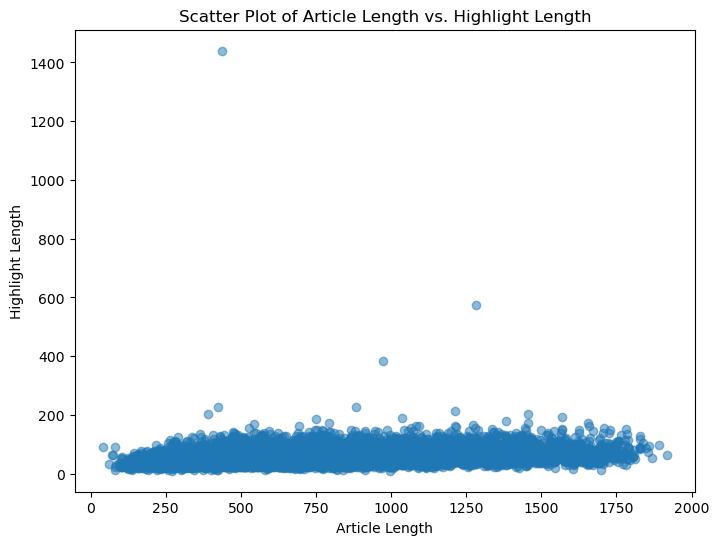

In [17]:
import matplotlib.pyplot as plt

# Calculate the lengths of articles and highlights
article_lengths = [len(i['article'].split()) for i in dataset['validation']]
highlight_lengths = [len(i['highlights'].split()) for i in dataset['validation']]

# Create scatter plot of article length vs. highlight length
plt.figure(figsize=(8, 6))
plt.scatter(article_lengths, highlight_lengths, alpha=0.5)
plt.title('Scatter Plot of Article Length vs. Highlight Length')
plt.xlabel('Article Length')
plt.ylabel('Highlight Length')
plt.show()

#### We are extracting Sample text from the dataset as the dataset is too big

In [18]:
import re

# Sample text extracted from the dataset
sample_text = dataset["train"][1]["article"][:20000]

# Function to clean the text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean the sample text
cleaned_text = clean_text(sample_text)

In [19]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Tokenize the cleaned text into words
words = word_tokenize(cleaned_text)

# Calculate word frequencies
word_frequencies = FreqDist(words)

# Display the most common words and their frequencies
print(word_frequencies.most_common(10))

[('the', 45), ('in', 20), ('and', 18), ('to', 18), ('a', 12), ('says', 12), ('they', 11), ('leifman', 11), ('of', 10), ('are', 10)]


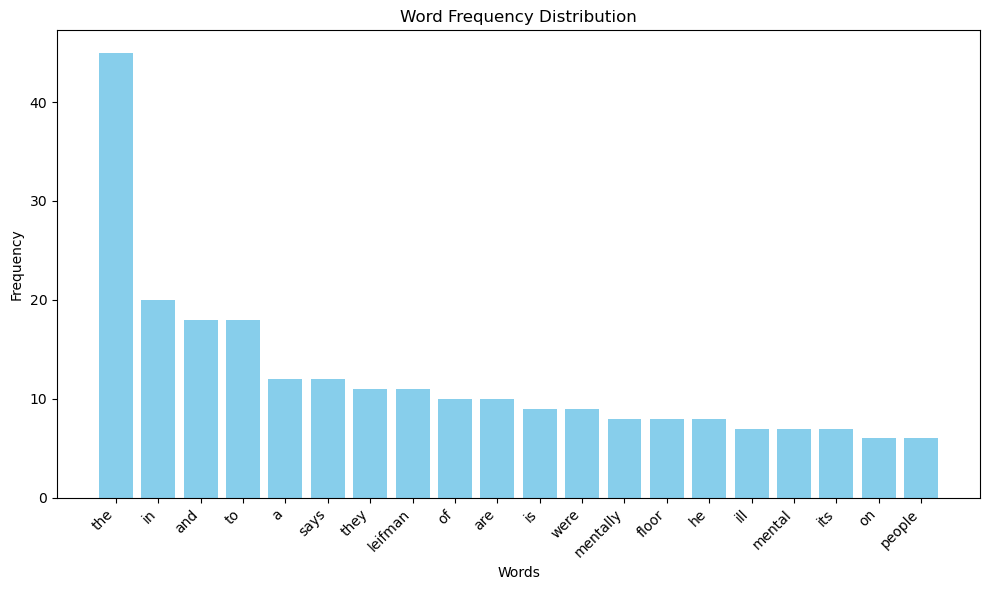

In [20]:
import matplotlib.pyplot as plt

# Get the top 20 most common words and their frequencies
top_words = word_frequencies.most_common(20)

# Extract words and frequencies for plotting
words, frequencies = zip(*top_words)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.title('Word Frequency Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sirismitharao/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment
sentiment_scores = sia.polarity_scores(cleaned_text)

# Print sentiment scores
print(sentiment_scores)

{'neg': 0.146, 'neu': 0.769, 'pos': 0.086, 'compound': -0.9877}


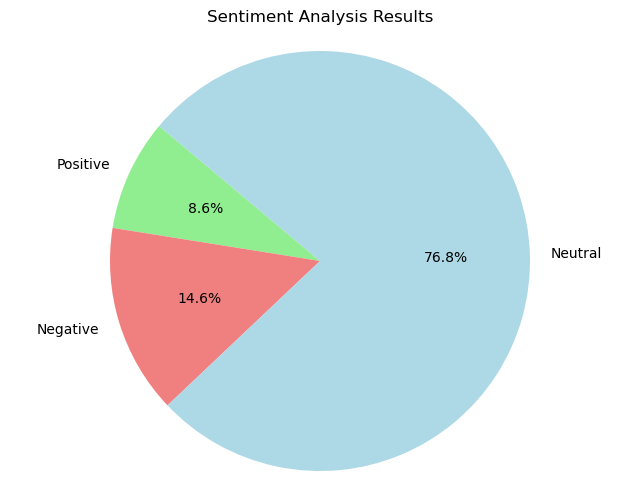

In [23]:
import matplotlib.pyplot as plt

# Sentiment scores obtained from the sentiment analyzer
positive_score = sentiment_scores['pos']
negative_score = sentiment_scores['neg']
neutral_score = sentiment_scores['neu']

# Plot pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_score, negative_score, neutral_score]
colors = ['lightgreen', 'lightcoral', 'lightblue']
explode = (0.1, 0, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Results')
plt.axis('equal')  
plt.show()

In [24]:
print(cleaned_text)

editors note in our behind the scenes series cnn correspondents share their experiences in covering news and analyze the stories behind the events here soledad obrien takes users inside a jail where many of the inmates are mentally ill an inmate housed on the forgotten floor where many mentally ill inmates are housed in miami before trial miami florida cnn the ninth floor of the miamidade pretrial detention facility is dubbed the forgotten floor here inmates with the most severe mental illnesses are incarcerated until theyre ready to appear in court most often they face drug charges or charges of assaulting an officer charges that judge steven leifman says are usually avoidable felonies he says the arrests often result from confrontations with police mentally ill people often wont do what theyre told when police arrive on the scene confrontation seems to exacerbate their illness and they become more paranoid delusional and less likely to follow directions according to leifman so they e

In [25]:
!pip install transformers

### Text Summarization BART

In [26]:
import tensorflow as tf

In [27]:
from transformers import pipeline

In [28]:
summ_obj = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6", revision="a4f8f3e")

In [29]:
# Generate the summary
summary = summ_obj(cleaned_text, max_length=150, min_length=40, do_sample=False)

print(summary[0]['summary_text'])

 The ninth floor of the miamidade pretrial detention facility is dubbed the forgotten floor . Inmates with the most severe mental illnesses are incarcerated until theyre ready to appear in court . They face drug charges or charges of assaulting an officer charges that judge steven leifman says are usually avoidable felonies . The judge says he has become a strong advocate for changing things in miami .


### TTS Using BARK

In [30]:
# install bark 
!pip install git+https://github.com/suno-ai/bark.git

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Cloning https://github.com/suno-ai/bark.git to /private/var/folders/27/wmdh_bp57s52nbdkb67xst4r0000gn/T/pip-req-build-ejnhhvnr
  Running command git clone --filter=blob:none --quiet https://github.com/suno-ai/bark.git /private/var/folders/27/wmdh_bp57s52nbdkb67xst4r0000gn/T/pip-req-build-ejnhhvnr
  Resolved https://github.com/suno-ai/bark.git to commit f4f32d4cd480dfec1c245d258174bc9bde3c2148
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [31]:
from bark import SAMPLE_RATE, generate_audio, preload_models
from IPython.display import Audio

preload_models()

No GPU being used. Careful, inference might be very slow!
/Users/sirismitharao/opt/anaconda3/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [32]:
summary_text = summary[0]['summary_text']

In [34]:
from IPython.display import Audio

# Generate audio from the summarized text
audio = generate_audio(summary_text)

# Save the audio to a variable
audio_data = Audio(data=audio, rate=SAMPLE_RATE)

audio_data

100%|███████████████████████████████████████████| 36/36 [03:14<00:00,  5.41s/it]


In [36]:
# Take input from the user
input_text = input("Enter the text you'd like to convert to audio: ")

# Generate audio from the input text
audio = generate_audio(input_text)

# Display the audio
Audio(data=audio, rate=SAMPLE_RATE)

Enter the text you'd like to convert to audio: Hi, This is Siri Smitha.


100%|███████████████████████████████████████████| 10/10 [00:43<00:00,  4.33s/it]


The Audio generated by BARK can be highly unpredictable. The Audio generated everytime we run the code is different and may not be precise.

### TTS using gTTS

In [37]:
!pip install gTTS

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [38]:
from gtts import gTTS
import os

def generate_audio(summary_text):
    tts = gTTS(text=summary_text, lang='en')
    tts.save("speech_output.mp3")

# Generate audio from summary text
generate_audio(summary_text)

os.system("start speech_output.mp3")

sh: start: command not found


32512

In [39]:
# Take input from the user
text = input("Enter the text you want to convert to speech: ")

# Generate speech using GTTS
tts = gTTS(text)

# Save the speech as an audio file
tts.save("output.mp3")

os.system("start output.mp3")

Enter the text you want to convert to speech: Hi, This is Siri Smitha. Studying at UMBC.


sh: start: command not found


32512

### STT - Speech to Text

In [40]:
!pip install soundfile

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [41]:
!pip install sounddevice

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [43]:
import sounddevice as sd
import numpy as np
import torch
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer

# Load pre-trained model and tokenizer
model_name = "facebook/wav2vec2-large-960h"
tokenizer = Wav2Vec2Tokenizer.from_pretrained(model_name)
model = Wav2Vec2ForCTC.from_pretrained(model_name)

# Function to transcribe audio
def transcribe_audio(audio_input):
    input_values = tokenizer(audio_input, return_tensors="pt").input_values
    logits = model(input_values).logits
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = tokenizer.batch_decode(predicted_ids)[0]
    return transcription

# Function to process microphone input
def process_microphone_input(duration=5, sample_rate=16000):
    print("Listening... Press 'q' and Enter to stop recording.")
    audio_frames = []
    try:
        while True:
            audio_input = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='int16')
            audio_frames.append(audio_input)
            key = input("")  # Wait for user to press a key
            if key.lower() == "q":
                break
    except KeyboardInterrupt:
        pass

    print("Recording stopped.")
    audio_input = np.concatenate(audio_frames)
    audio_input = np.squeeze(audio_input)
    return audio_input

# Main function
def main():
    audio_input = process_microphone_input()
    transcription = transcribe_audio(audio_input)
    print("Transcription:", transcription)

if __name__ == "__main__":
    main()

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
Some weights of the model checkpoint at facebook/wav2vec2-large-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec

Listening... Press 'q' and Enter to stop recording.
q
Recording stopped.
Transcription: BUT OUR HUNDRED PER CENT OFF FROM MAY FOURTH FIRST WE HAVE AN ELECTRIC TOOTHBRUSH WITH EIGHT REPLACEMENTHEADS SCROLLED DOWN
